In [1]:
import os
import pickle
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# = = = = = = = = = = = = = 
# get data
# df_energy = data_prepro.get_energy_data_today(to_date=t_wednesday.strftime('%Y%m%d'))

# Read data from file with specified data types
df_energy = pd.read_csv("data/2015-01-01_2024-02-21_energy.csv", index_col=0, parse_dates=[0])
df_energy['timestamp_CET'] = pd.to_datetime(df_energy['timestamp_CET'], utc=True).dt.tz_convert('CET')
print(df_energy.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80136 entries, 2014-12-31 23:00:00+00:00 to 2024-02-21 22:00:00+00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   timestamp_CET  80136 non-null  datetime64[ns, CET]
 1   gesamt         80136 non-null  float64            
dtypes: datetime64[ns, CET](1), float64(1)
memory usage: 1.8 MB
None


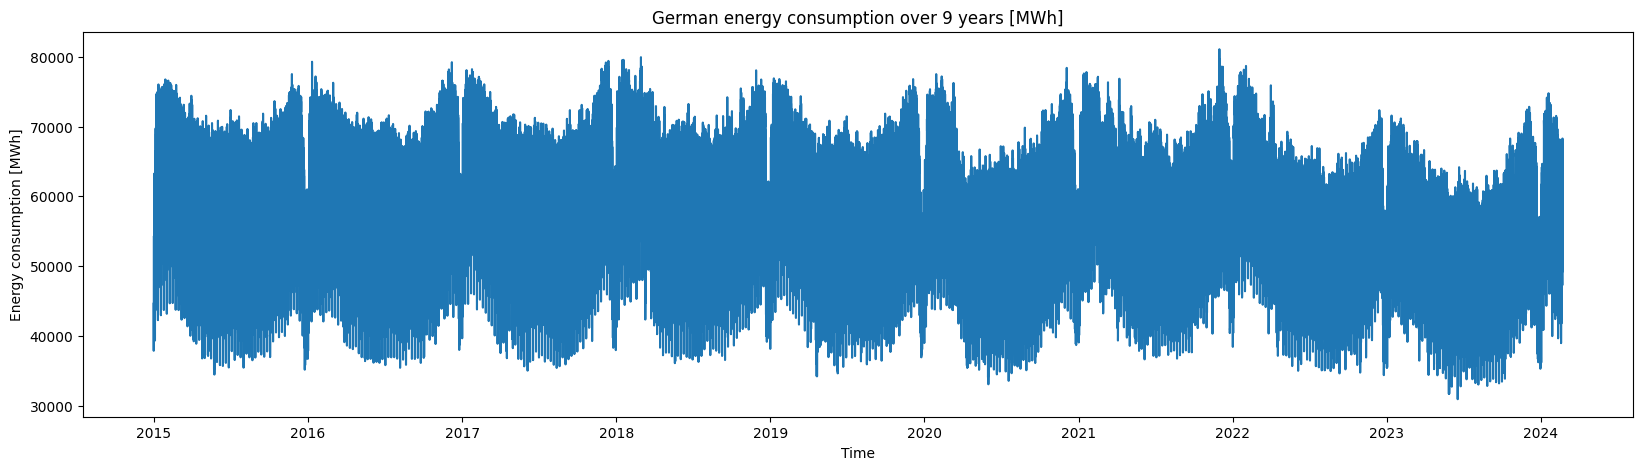

In [49]:
plt.figure(figsize=(20,5))
plt.plot(df_energy['gesamt'])

plt.xlabel('Time')
plt.ylabel('Energy consumption [MWh]')
plt.title('German energy consumption over 9 years [MWh]')
plt.show()

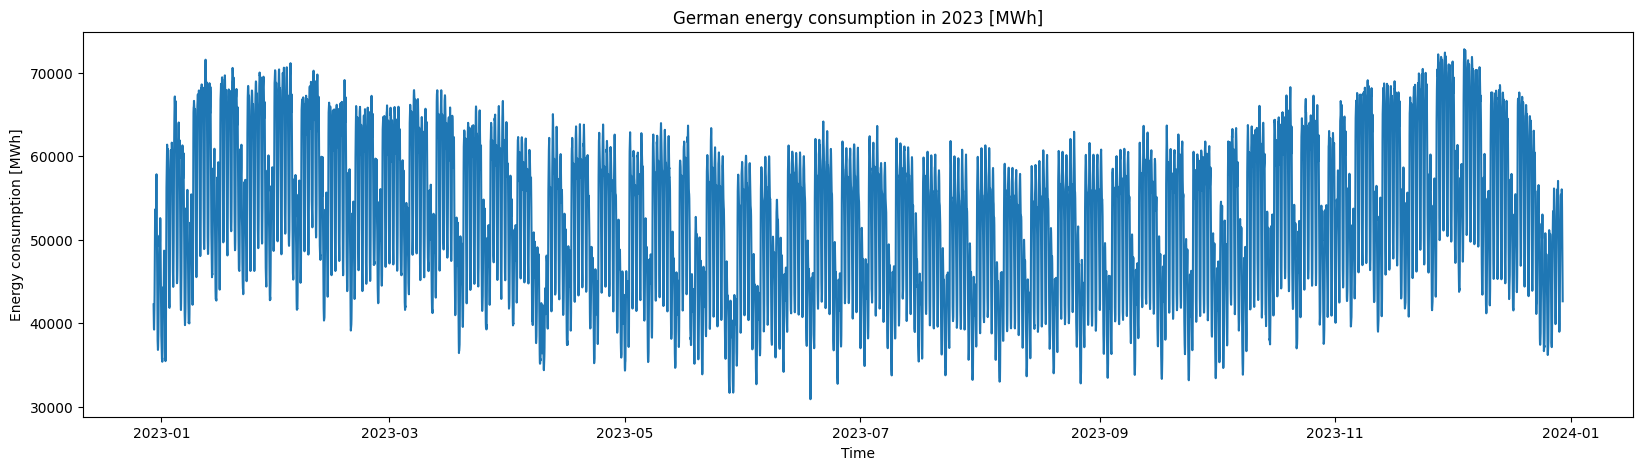

In [50]:
plt.figure(figsize=(20,5))

yr = 8
plt.plot(df_energy['gesamt'].iloc[yr*24*365:(yr+1)*24*365])

plt.xlabel('Time')
plt.ylabel('Energy consumption [MWh]')
plt.title('German energy consumption in 2023 [MWh]')
plt.show()

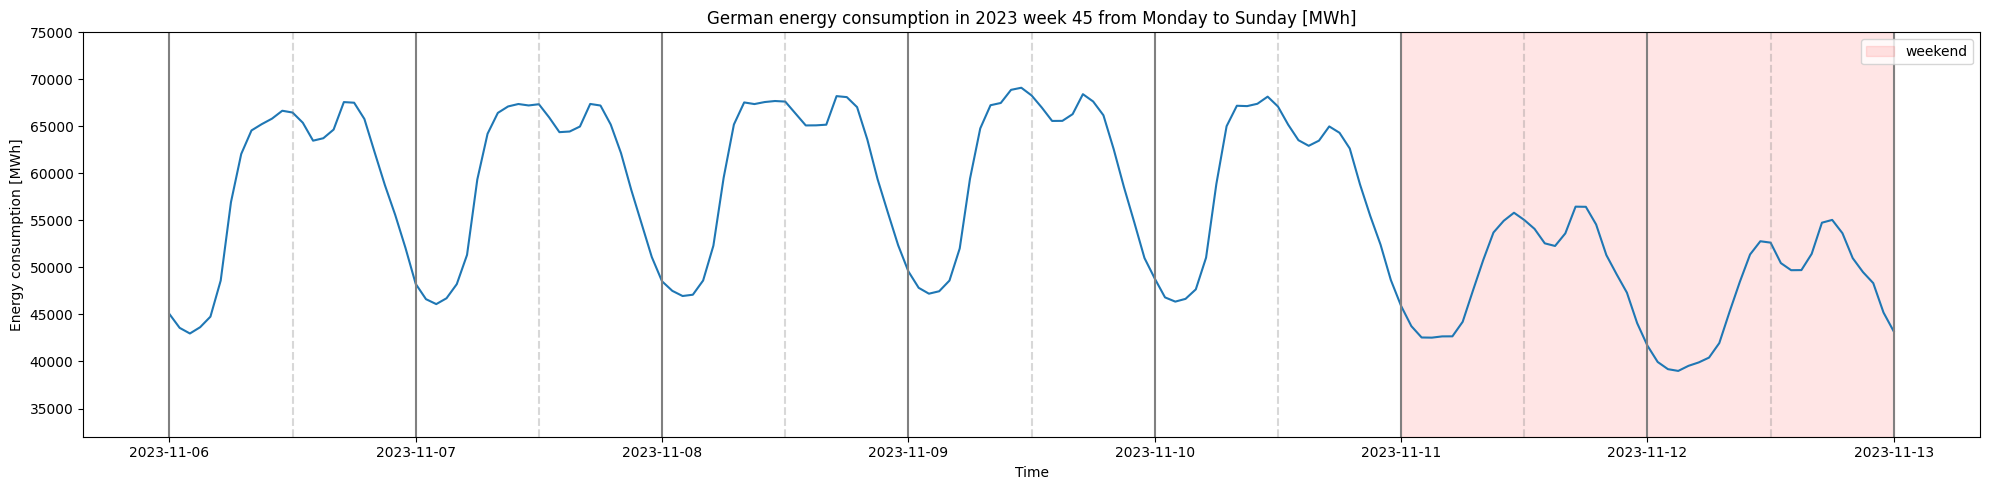

In [61]:
plt.figure(figsize=(20,5))
df_subset = df_energy.loc[(df_energy['timestamp_CET'] >= "2023-11-06") & (df_energy['timestamp_CET'] <= "2023-11-13")]
plt.plot(df_subset['timestamp_CET'], df_subset['gesamt'])

# add grey vertical lines at each new day
for i in range(8):
    plt.axvline(x=df_subset.index[i*24], color='grey', linestyle='-')
    if i < 7: plt.axvline(x=df_subset.index[i*24 + 12], color='grey', linestyle='--', alpha=0.3)


plt.axvspan(df_subset.index[5*24], df_subset.index[7*24], color='red', alpha=0.1, label='weekend')

plt.ylim(32_000, 75_000)
plt.xlabel('Time')
plt.ylabel('Energy consumption [MWh]')
plt.legend(loc='upper right')
plt.title('German energy consumption in 2023 week 45 from Monday to Sunday [MWh]')

# Save plot as PDF
plt.tight_layout()
plt.savefig("energy_data_weekly.pdf")
plt.show()

C:\Users\ytl_c\AppData\Local\Temp\ipykernel_25376\2586554537.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axvspan(index[5*24], index[6*24], color='blue', alpha=0.1, label='2023 easter sunday')
C:\Users\ytl_c\AppData\Local\Temp\ipykernel_25376\2586554537.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axvspan(index[13*24], index[14*24], color='orange', alpha=0.1, label='2022 easter sunday')


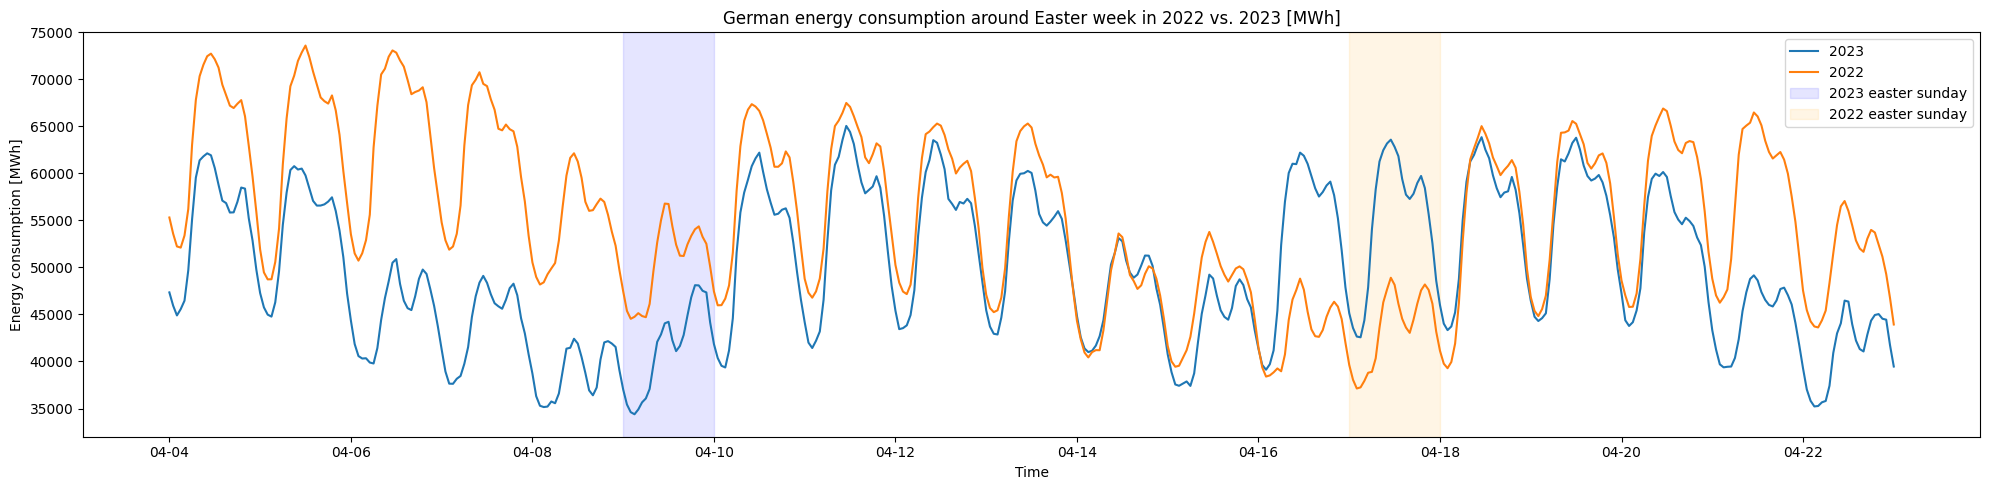

In [60]:
plt.figure(figsize=(20,5))
df_subset = df_energy.loc[(df_energy['timestamp_CET'] >= "2023-04-05") & (df_energy['timestamp_CET'] <= "2023-04-24")]

index = df_subset['timestamp_CET']
# index = np.arange(0, df_subset.shape[0])

plt.plot(index, df_subset['gesamt'], label='2023')

df_subset = df_energy.loc[(df_energy['timestamp_CET'] >= "2022-04-05") & (df_energy['timestamp_CET'] <= "2022-04-24")]
plt.plot(index, df_subset['gesamt'], label='2022')

# color easters
plt.axvspan(index[5*24], index[6*24], color='blue', alpha=0.1, label='2023 easter sunday')
plt.axvspan(index[13*24], index[14*24], color='orange', alpha=0.1, label='2022 easter sunday')

# Format x-axis labels to display only month and day
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

plt.ylim(32_000, 75_000)
plt.xlabel('Time')
plt.ylabel('Energy consumption [MWh]')
plt.legend(loc='upper right')
plt.title('German energy consumption around Easter week in 2022 vs. 2023 [MWh]')

# Save plot as PDF
plt.tight_layout()
plt.savefig("energy_data_easter_comparison.pdf")
plt.show()